Lập trình Python cho Máy học - CS116.Q11

ĐỒ ÁN: Tiền xử lý dữ liệu

In [1]:
# Import thư viện cần thiết
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import re
from datetime import datetime

CHỌN ĐƯỜNG DẪN

In [2]:
# Đường dẫn thư mục chứa các file parquet
base_path = Path(r"D:\recommendation dataset")

ĐỌC DỮ LIỆU SƯƠNG SƯƠNG

In [3]:
# Tắt cảnh báo không cần thiết
warnings.filterwarnings('ignore')

# Cài đặt style cho biểu đồ
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Tìm tất cả file parquet trong thư mục
all_parquet_files = list(base_path.glob("*.parquet"))
print(f"Tìm thấy {len(all_parquet_files)} file parquet trong thư mục.")

# Phân loại file theo tên
sales_item_files = []
sales_purchase_files = []
sales_user_files = []

for file_path in all_parquet_files:
    name = file_path.name.lower()
    
    if "sales_pers.item" in name:
        sales_item_files.append(file_path)
    elif "sales_pers.purchase" in name or "sales_pers.purchase_history_daily" in name:
        sales_purchase_files.append(file_path)
    elif "sales_pers.user" in name:
        sales_user_files.append(file_path)

# In kết quả phân loại
print(f"""
 Tổng kết:
   sales_pers.item: {len(sales_item_files)} files
   sales_pers.purchase: {len(sales_purchase_files)} files
   sales_pers.user: {len(sales_user_files)} files
""")

# Hàm đọc nhóm file parquet
def read_parquet_group(file_list, group_name):
    if not file_list:
        print(f"Không có file nào cho nhóm {group_name}")
        return None
    
    print(f"Đang đọc {len(file_list)} file(s) cho nhóm {group_name}...")
    
    df = pl.read_parquet(file_list)
    
    print(f"{group_name} loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
    return df

# Đọc dữ liệu từ các nhóm file
sales_item_df = read_parquet_group(sales_item_files, "SALES ITEM")
sales_purchase_df = read_parquet_group(sales_purchase_files, "SALES PURCHASE")
sales_user_df = read_parquet_group(sales_user_files, "SALES USER")

# Tổng kết dữ liệu đã đọc
print("\nTỔNG KẾT DỮ LIỆU:")
if sales_item_df is not None:
    print(f"sales_item_df: {sales_item_df.shape}")
if sales_purchase_df is not None:
    print(f"sales_purchase_df: {sales_purchase_df.shape}")
if sales_user_df is not None:
    print(f"sales_user_df: {sales_user_df.shape}")

Tìm thấy 83 file parquet trong thư mục.

 Tổng kết:
   sales_pers.item: 1 files
   sales_pers.purchase: 72 files
   sales_pers.user: 10 files

Đang đọc 1 file(s) cho nhóm SALES ITEM...
SALES ITEM loaded: 27,332 rows × 34 columns
Đang đọc 72 file(s) cho nhóm SALES PURCHASE...
SALES PURCHASE loaded: 35,729,825 rows × 16 columns
Đang đọc 10 file(s) cho nhóm SALES USER...
SALES USER loaded: 4,573,964 rows × 18 columns

TỔNG KẾT DỮ LIỆU:
sales_item_df: (27332, 34)
sales_purchase_df: (35729825, 16)
sales_user_df: (4573964, 18)


In [4]:
# Tạo dictionary chứa các DataFrame
datasets = {
    "SALES ITEM": sales_item_df,
    "SALES PURCHASE": sales_purchase_df,
    "SALES USER": sales_user_df
}

In [5]:
# Thống kê tất cả các cột trong từng bảng
# Tháo docstring (""") ra để chạy thử, nhưng khá lâu!
# Khỏi chạy nếu không cần thiết!

"""
for name, df in datasets.items():
    if df is None:
        continue

    print(f"\n[ {name} ]")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print("Columns:", df.columns)

    print("\nThống kê tất cả các cột:")
    for col in df.columns:
        try:
            # Ép kiểu về chuỗi để thống kê phổ biến
            col_str = df[col].cast(pl.Utf8).drop_nulls()
            unique_count = col_str.n_unique()
            most_common = col_str.value_counts().sort("count", descending=True).head(1)

            if most_common.shape[0] > 0:
                most_common_val = most_common[0, col]
                most_common_freq = most_common[0, "count"]
                print(f" - {col}: {unique_count} giá trị duy nhất, phổ biến nhất: '{most_common_val}' ({most_common_freq} lần)")
            else:
                print(f" - {col}: {unique_count} giá trị duy nhất, không có giá trị phổ biến")

        except Exception as e:
            print(f"Lỗi khi thống kê cột '{col}': {e}")
"""

'\nfor name, df in datasets.items():\n    if df is None:\n        continue\n\n    print(f"\n[ {name} ]")\n    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")\n    print("Columns:", df.columns)\n\n    print("\nThống kê tất cả các cột:")\n    for col in df.columns:\n        try:\n            # Ép kiểu về chuỗi để thống kê phổ biến\n            col_str = df[col].cast(pl.Utf8).drop_nulls()\n            unique_count = col_str.n_unique()\n            most_common = col_str.value_counts().sort("count", descending=True).head(1)\n\n            if most_common.shape[0] > 0:\n                most_common_val = most_common[0, col]\n                most_common_freq = most_common[0, "count"]\n                print(f" - {col}: {unique_count} giá trị duy nhất, phổ biến nhất: \'{most_common_val}\' ({most_common_freq} lần)")\n            else:\n                print(f" - {col}: {unique_count} giá trị duy nhất, không có giá trị phổ biến")\n\n        except Exception as e:\n            print(f"

In [6]:
# Thống kê tất cả các cột trong từng bảng
# Tháo docstring (""") ra để chạy thử, nhưng khá lâu!
# Khỏi chạy nếu không cần thiết!

for name, df in datasets.items():
    if df is None:
        continue
    print(f"\n[ {name} ]")
    print("\n Missing values:")
    print(df.null_count().to_pandas().T)
    print("\nMô tả dữ liệu số:")
    display(df.describe())


[ SALES ITEM ]

 Missing values:
                        0
p_id                    0
item_id                 0
price                   0
category_l1_id          0
category_l1             0
category_l2_id          0
category_l2             0
category_l3_id          0
category_l3             0
category_id             0
category                0
description             0
brand                   0
manufacturer            0
creation_timestamp      0
is_deleted              0
created_date            0
updated_date            0
sync_status_id        786
last_sync_date        786
sync_error_message  27332
image_url               0
gender_target           0
age_group               0
item_type               0
gp                      0
weight              27332
color                   0
size                    0
origin                  0
volume                  0
material                0
sale_status             0
description_new      5015

Mô tả dữ liệu số:


statistic,p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
str,f64,str,f64,f64,str,f64,str,f64,str,f64,str,str,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,f64,f64,str,str,str,str,str,f64,str
"""count""",27332.0,"""27332""",27332.0,27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""","""27332""","""27332""","""27332""",27332.0,27332.0,"""27332""","""27332""",26546.0,"""26546""","""0""","""27332""","""27332""","""27332""","""27332""",27332.0,0.0,"""27332""","""27332""","""27332""","""27332""","""27332""",27332.0,"""22317"""
"""null_count""",0.0,"""0""",0.0,0.0,"""0""",0.0,"""0""",0.0,"""0""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""",786.0,"""786""","""27332""","""0""","""0""","""0""","""0""",0.0,27332.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""5015"""
"""mean""",106317.679643,null,190456.829467,2836.189192,null,3719.039843,null,4876.768294,null,4920.712718,null,null,null,null,1.6225e9,0.0,"""2021-05-31 17:17:33.849833""","""2025-08-30 04:07:07.766157""",2.0,"""2025-07-18 18:00:25.086391""",null,null,null,null,null,49696.651226,null,null,null,null,null,null,0.167203,null
"""std""",25425.734073,null,511123.971813,1417.521137,null,1935.042044,null,2035.952741,null,1999.308355,null,null,null,null,7.5666e7,null,null,null,0.0,null,null,null,null,null,null,144155.68753,null,null,null,null,null,null,0.373164,null
"""min""",1675.0,"""0000280000019""",0.0,1.0,"""Babycare""",2.0,"""0-1Y""",14.0,"""A2 milk""",4.0,"""0-12M Bodysuit bé trai đùi""","""Với kiểu dáng đơn giản nhưng …","""137 Degrees""","""(L) Địa điểm kinh doanh 1 - Ch…",1.2983e9,0.0,"""2011-02-21 11:54:02.047000""","""2023-12-26 17:21:11.663000""",2.0,"""2025-07-18 17:59:29.898256""",null,"""Không xác định""","""Bé Gái""","""0-10M""","""BCS""",0.0,null,"""Bạc""","""0 tháng""",""" Singapore, Thụy Sĩ""","""1 lít""",""" Vải không dệt, bông cellulose…",0.0,"""Chi tiết sản phẩm …"
"""25%""",88905.0,null,49000.0,2788.0,null,2038.0,null,3516.0,null,3522.0,null,null,null,null,1.5755e9,null,"""2019-12-04 18:24:16.260000""","""2025-08-18 09:59:19.847000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,0.0,null,null,null,null,null,null,0.0,null
"""50%""",104510.0,null,119000.0,3292.0,null,3958.0,null,5254.0,null,5511.0,null,null,null,null,1.6358e9,null,"""2021-11-01 13:19:26.080000""","""2025-09-26 08:05:23.153000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,25047.0,null,null,null,null,null,null,0.0,null
"""75%""",120262.0,null,199000.0,3292.0,null,4571.0,null,6984.0,null,6988.0,null,null,null,null,1.6699e9,null,"""2022-12-01 15:40:42.260000""","""2025-09-27 00:05:36.233000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,65532.0,null,null,null,null,null,null,0.0,null
"""max""",167147.0,"""7497000000006""",2.099e7,7376.0,"""Đồ chơi & Sách""",7492.0,"""Đồ uống""",7493.0,"""Đồ hộp""",7501.0,"""Động vật mô hình""","""﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿Bỉm …","""Đức Thành""","""﻿Shantou City Chenghai Jia Ron…",1.7559e9,0.0,"""2025-08-22 17:35:14.377000""","""2025-10-01 08:05:42.990000""",2.0,"""2025-07-21 10:59:04.045058""",null,"""Không xác định""","""Unisex""","""[""Từ 6M"", ""Từ 9M"", ""Từ 1Y""]""","""Ứng dụng mẹ và bé""",5.54136e6,null,"""Đỏ""","""XXL(15-25kg) - 26 miếng""","""Ấn Độ, Bulgaria""","""hộp 3 lọ x 250ml""","""﻿100% cotton﻿<br>""",1.0,"""Xin lỗi, nhưng tôi không thể t…"



[ SALES PURCHASE ]

 Missing values:
              0
timestamp     0
user_id       0
item_id       0
event_type    0
event_value   0
price         0
date_key      0
quantity      0
customer_id   0
created_date  0
updated_date  0
channel       0
payment       0
location      0
discount      0
is_deleted    0

Mô tả dữ liệu số:


statistic,timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
str,f64,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64
"""count""",3.5729825e7,"""35729825""","""35729825""","""35729825""",3.5729825e7,3.5729825e7,3.5729825e7,3.5729825e7,3.5729825e7,"""35729825""","""35729825""","""35729825""","""35729825""",3.5729825e7,3.5729825e7,3.5729825e7
"""null_count""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",1.7199e9,null,null,null,1.508098,169188.742494,2.0241e7,1.508098,4.8713e6,"""2024-07-02 17:13:24.220955""","""2024-07-02 18:27:59.561504""",null,null,448.414508,17235.651914,0.0
"""std""",9.1568e6,null,null,null,2.264976,195539.88976,346.231465,2.264976,2.2697e6,null,null,null,null,247.505432,46673.708499,null
"""min""",1.7041e9,"""0000063a29e92d643437aa09266fdc…","""0000280000019""","""Purchase""",1.0,0.0444,2.0240101e7,1.0,14732.0,"""2024-01-01 06:44:59.037000""","""2024-01-01 06:44:59.233000""","""Android""","""Chuyển khoản""",16.0,0.0,0.0
"""25%""",1.7120e9,null,null,null,1.0,48316.3914,2.0240401e7,1.0,3.06641e6,"""2024-04-01 16:44:10.513000""","""2024-04-01 17:15:12.017000""",null,null,234.0,0.0,null
"""50%""",1.7199e9,null,null,null,1.0,87000.0,2.0240702e7,1.0,5.373736e6,"""2024-07-02 19:06:52.293000""","""2024-07-02 19:42:24.550000""",null,null,439.0,0.0,null
"""75%""",1.7279e9,null,null,null,1.0,244000.0,2.0241002e7,1.0,6.853734e6,"""2024-10-02 19:55:22.447000""","""2024-10-02 20:24:53.813000""",null,null,653.0,15000.0,null
"""max""",1.7357e9,"""fffff7e197ebf5c523fa686e6a305c…","""7352000000004""","""Purchase""",240.0,2.099e7,2.0241231e7,240.0,8.208027e6,"""2024-12-31 22:35:19.510000""","""2025-09-27 21:25:22.960000""","""iOS""","""ZaloPay""",1036.0,7.995e6,0.0



[ SALES USER ]

 Missing values:
                          0
customer_id               0
gender                    0
location                  0
province                  0
membership                0
timestamp                 0
created_date              0
updated_date              0
sync_status_id       338285
last_sync_date       338285
sync_error_message  4573964
region                    0
location_name             0
install_app               0
install_date              0
district                  0
user_id                   0
is_deleted                0

Mô tả dữ liệu số:


statistic,customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
str,f64,str,f64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,str,f64
"""count""",4.573964e6,"""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.235679e6,"""4235679""","""0""","""4573964""","""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6
"""null_count""",0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",338285.0,"""338285""","""4573964""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0
"""mean""",6.1266e6,null,554.053518,null,null,1.6712e9,"""2022-12-16 22:48:44.025646""","""2025-06-11 05:52:40.770554""",2.0,"""2025-07-16 15:20:34.188640""",null,null,null,null,1.6841e9,null,null,0.0
"""std""",2.4412e6,null,295.523361,null,null,7.9743e7,null,null,0.0,null,null,null,null,null,7.1374e7,null,null,null
"""min""",14732.0,"""Khác""",42.0,"""An Giang""","""Diamond""",1.3064e9,"""2011-05-25 21:11:51.677000""","""2019-06-30 08:38:47.100000""",2.0,"""2025-07-16 11:54:29.816986""",null,"""Bắc Trung Bộ""","""AGI - 110 Quốc Lộ 91""","""Android""",1.3063e9,""" Vũng Liêm""","""000004697bc1f0ecab42b6a3c2f0bc…",0.0
"""25%""",4.53268e6,null,302.0,null,null,1.6343e9,"""2021-10-15 10:09:34.280000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 11:58:58.022193""",null,null,null,null,1.6550e9,null,null,null
"""50%""",6.843955e6,null,547.0,null,null,1.6960e9,"""2023-09-29 16:33:25.217000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 12:03:34.550186""",null,null,null,null,1.7054e9,null,null,null
"""75%""",8.029649e6,null,765.0,null,null,1.7312e9,"""2024-11-09 14:38:22.223000""","""2025-08-02 10:54:03.860000""",2.0,"""2025-07-16 12:11:53.888687""",null,null,null,null,1.7366e9,null,null,null
"""max""",9.264159e6,"""Nữ""",1310.0,"""Đồng Tháp""","""Standard""",1.7593e9,"""2025-09-30 22:00:36.623000""","""2025-09-30 23:22:08.957000""",2.0,"""2025-07-21 11:19:29.058389""",null,"""Đồng bằng sông Cửu Long""","""ĐTH - Trần Hưng Đạo""","""iOS""",1.7592e9,"""Ứng Hòa""","""fffffbd469d500229dd000e9fc48ed…",0.0


TASK 1: Loại bỏ các cột không cần thiết. 

In [7]:
# Danh sách các cột cần loại bỏ
cols_to_drop = [
    # SALES ITEM
    "is_deleted",
    "last_sync_date",
    "sync_error_message",
    "image_url",
    "description_new",
    "weight",
    "sync_status_id",
    "p_id",
    "item_id",
    "category_l1_id",
    "category_l2_id",
    "category_l3_id",
    "category_id",
    "description",
    "manufacturer",

    # SALES PURCHASE
    "is_deleted",
    "event_type",
    "user_id",
    "item_id",
    "customer_id",

    # SALES USER
    "is_deleted",
    "sync_status_id",
    "last_sync_date",
    "sync_error_message",
    "customer_id",
    "user_id"
]

In [8]:
# Lặp qua từng DataFrame trong datasets
for name, df in datasets.items():
    if df is None:
        continue

    print(f"\n[ {name} ]")
    existing_cols = [c for c in cols_to_drop if c in df.columns]

    if existing_cols:
        print(f" - Các cột sẽ bị loại bỏ: {existing_cols}")
        df = df.drop(existing_cols)
        datasets[name] = df  # Cập nhật lại DataFrame sau khi loại bỏ
    else:
        print(" - Không có cột nào trong danh sách cần loại bỏ.")

    print(f" - Kích thước mới: {df.shape[0]:,} rows × {df.shape[1]} columns")



[ SALES ITEM ]
 - Các cột sẽ bị loại bỏ: ['is_deleted', 'last_sync_date', 'sync_error_message', 'image_url', 'description_new', 'weight', 'sync_status_id', 'p_id', 'item_id', 'category_l1_id', 'category_l2_id', 'category_l3_id', 'category_id', 'description', 'manufacturer', 'is_deleted', 'item_id', 'is_deleted', 'sync_status_id', 'last_sync_date', 'sync_error_message']
 - Kích thước mới: 27,332 rows × 19 columns

[ SALES PURCHASE ]
 - Các cột sẽ bị loại bỏ: ['is_deleted', 'item_id', 'is_deleted', 'event_type', 'user_id', 'item_id', 'customer_id', 'is_deleted', 'customer_id', 'user_id']
 - Kích thước mới: 35,729,825 rows × 11 columns

[ SALES USER ]
 - Các cột sẽ bị loại bỏ: ['is_deleted', 'last_sync_date', 'sync_error_message', 'sync_status_id', 'is_deleted', 'user_id', 'customer_id', 'is_deleted', 'sync_status_id', 'last_sync_date', 'sync_error_message', 'customer_id', 'user_id']
 - Kích thước mới: 4,573,964 rows × 12 columns


TASK 2.1: Xử lý NULL

In [9]:
# Trong lúc xóa các cột thì các giá trị null đã bị loại bỏ rồi!

TASK 2.2: Xử lý Outlier

In [10]:
# Xác định và hiển thị các cột numeric trong từng dataset
numeric_columns = {}

for name, df in datasets.items():
    if df is None:
        continue

    # Lấy danh sách các cột có kiểu dữ liệu số
    num_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in pl.NUMERIC_DTYPES]
    
    numeric_columns[name] = num_cols
    
    print(f"\n[ {name} ]")
    print(f" - Tổng số cột numeric: {len(num_cols)}")
    if num_cols:
        print(f" - Danh sách cột numeric: {num_cols}")
    else:
        print(" - Không có cột numeric nào.")



[ SALES ITEM ]
 - Tổng số cột numeric: 4
 - Danh sách cột numeric: ['price', 'creation_timestamp', 'gp', 'sale_status']

[ SALES PURCHASE ]
 - Tổng số cột numeric: 7
 - Danh sách cột numeric: ['timestamp', 'event_value', 'price', 'date_key', 'quantity', 'location', 'discount']

[ SALES USER ]
 - Tổng số cột numeric: 3
 - Danh sách cột numeric: ['location', 'timestamp', 'install_date']


In [11]:
# Style
sns.set(style="whitegrid", palette="husl")
# Cấu hình
max_sample = 1000  # số dòng dùng để vẽ biểu đồ
# Nhóm và cột numeric cần xử lý
target_columns = {
    "SALES ITEM": ['price', 'creation_timestamp', 'gp'],
    "SALES PURCHASE": ['price','timestamp'],
    "SALES USER": ['timestamp', 'install_date']
}


[SALES ITEM] - Xử lý outlier theo IQR (Capping)
 - price: 1,328 giá trị outlier bị capping


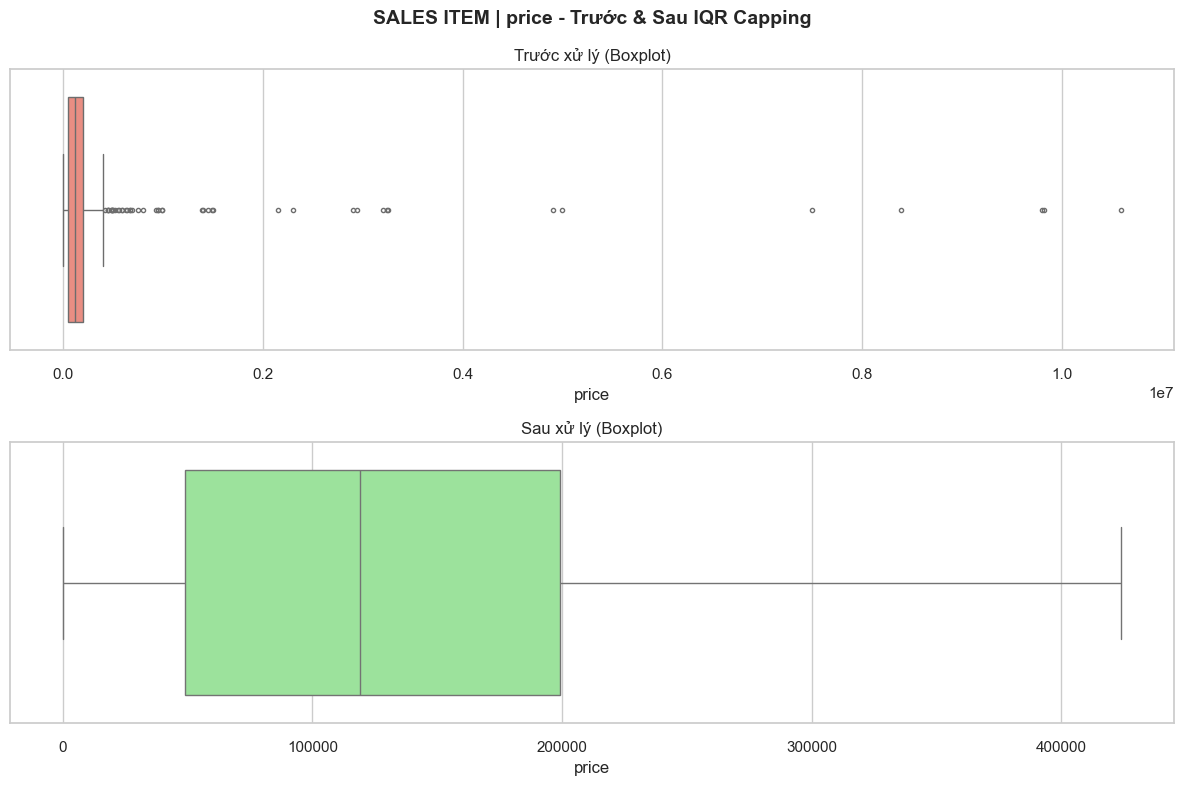

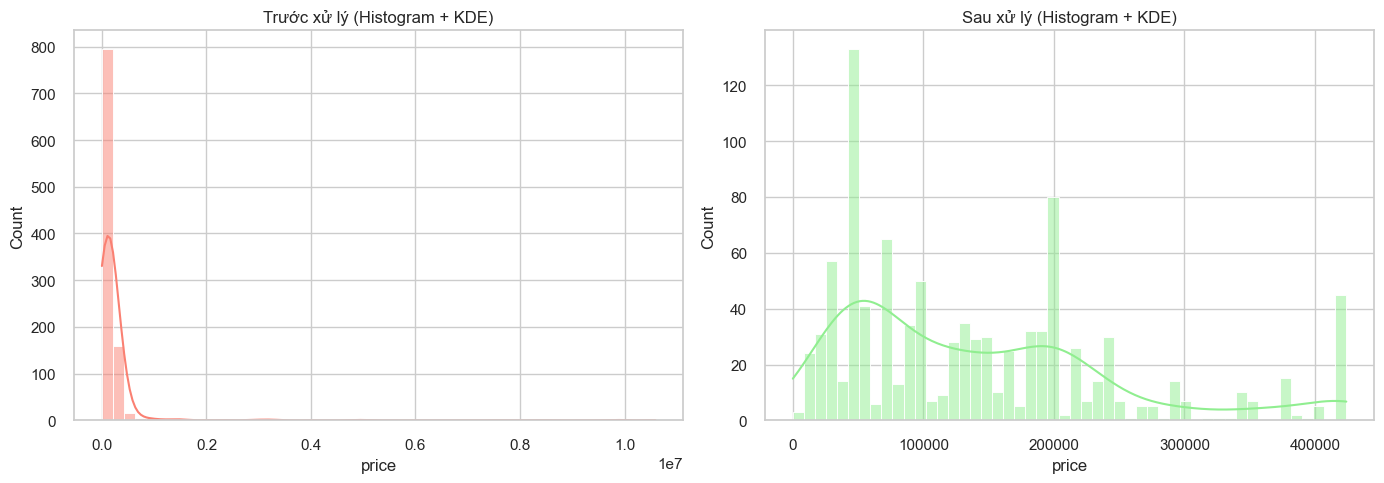

 - creation_timestamp: 304 giá trị outlier bị capping


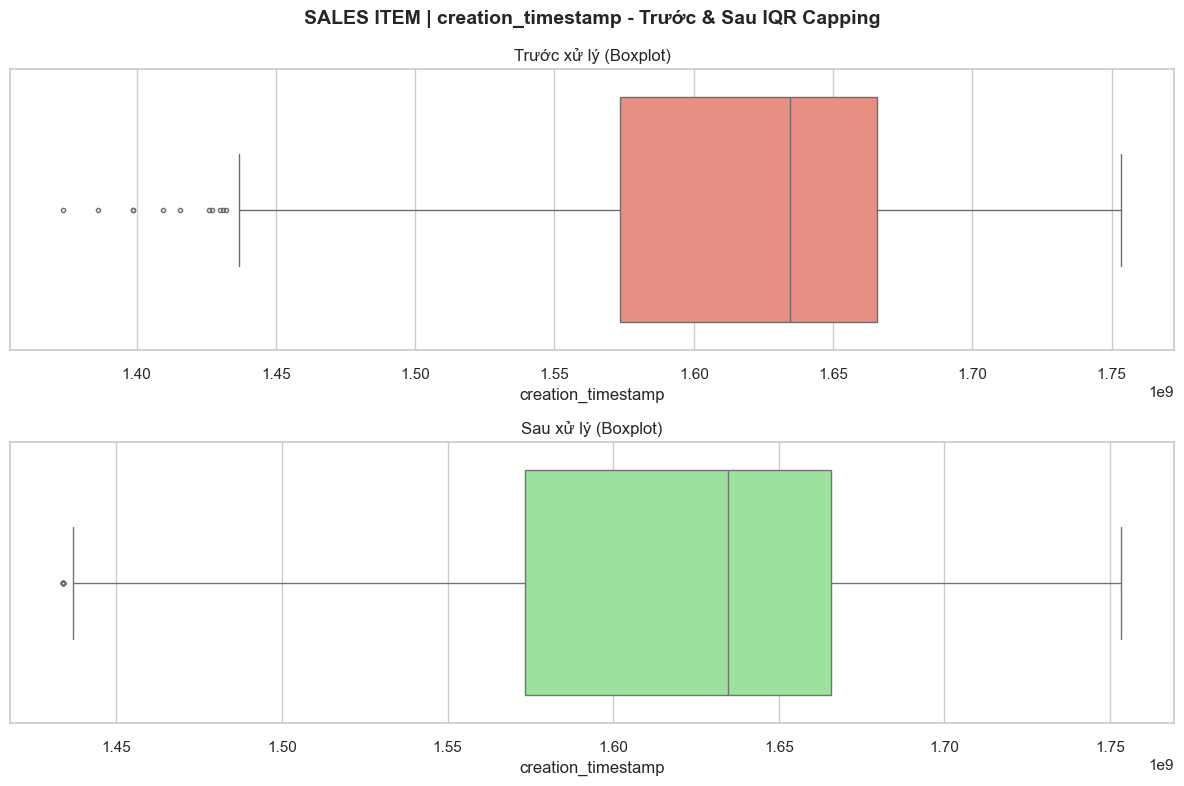

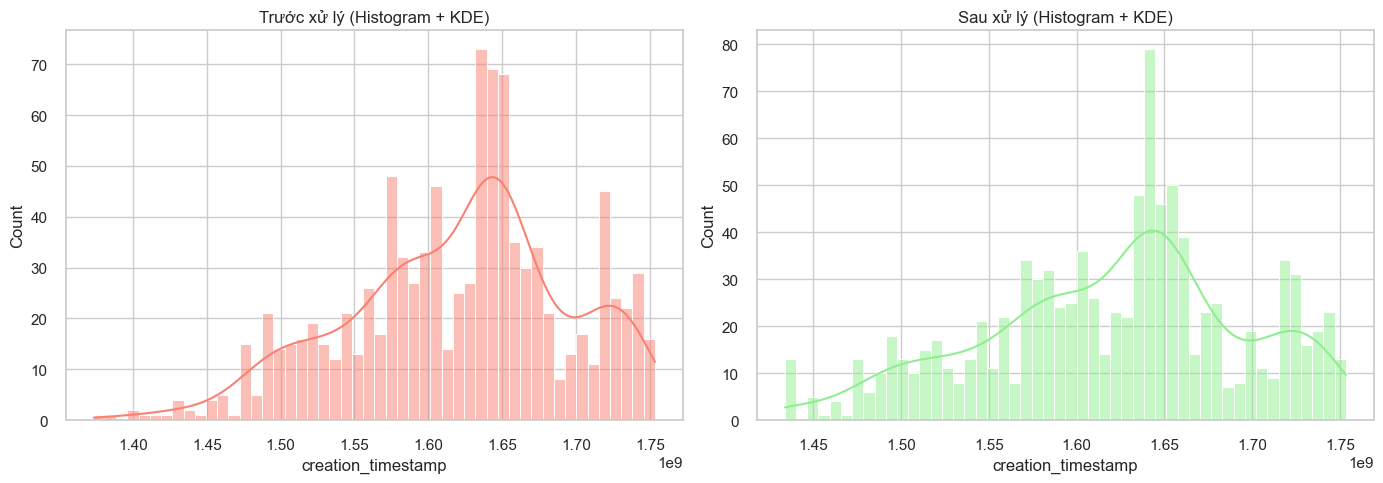

 - gp: 827 giá trị outlier bị capping


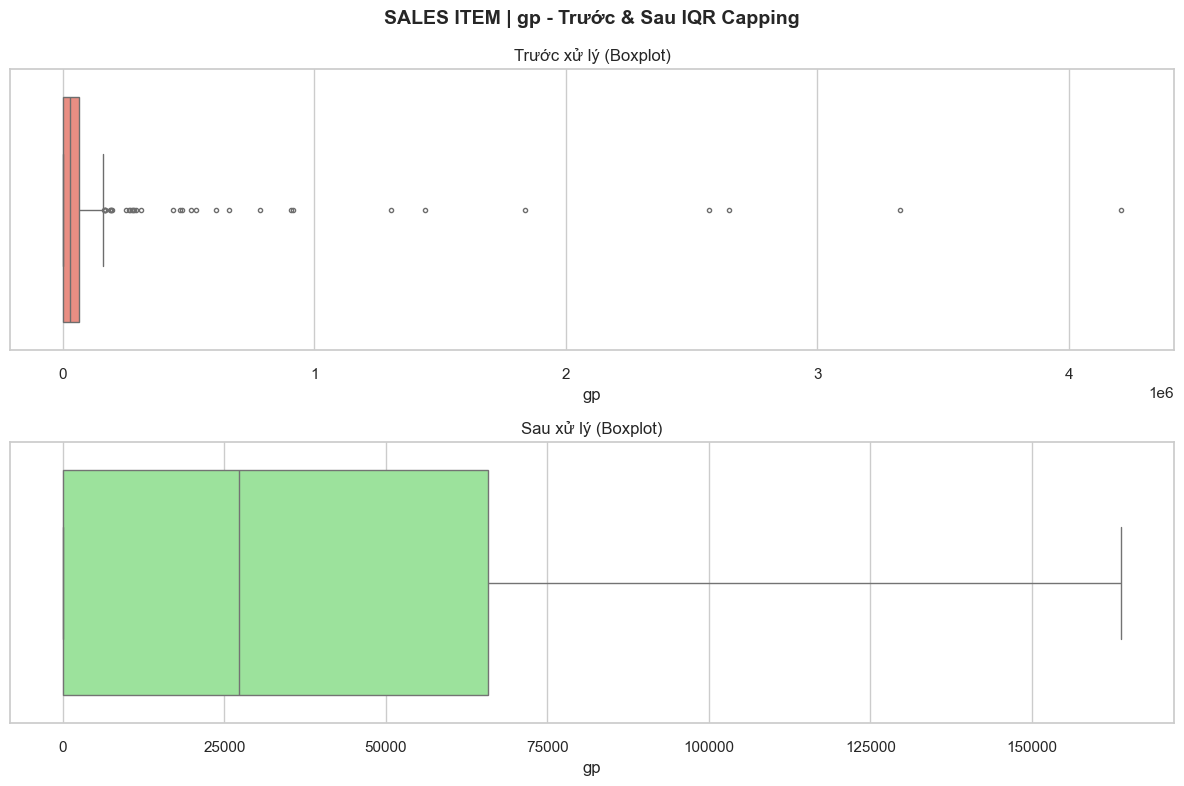

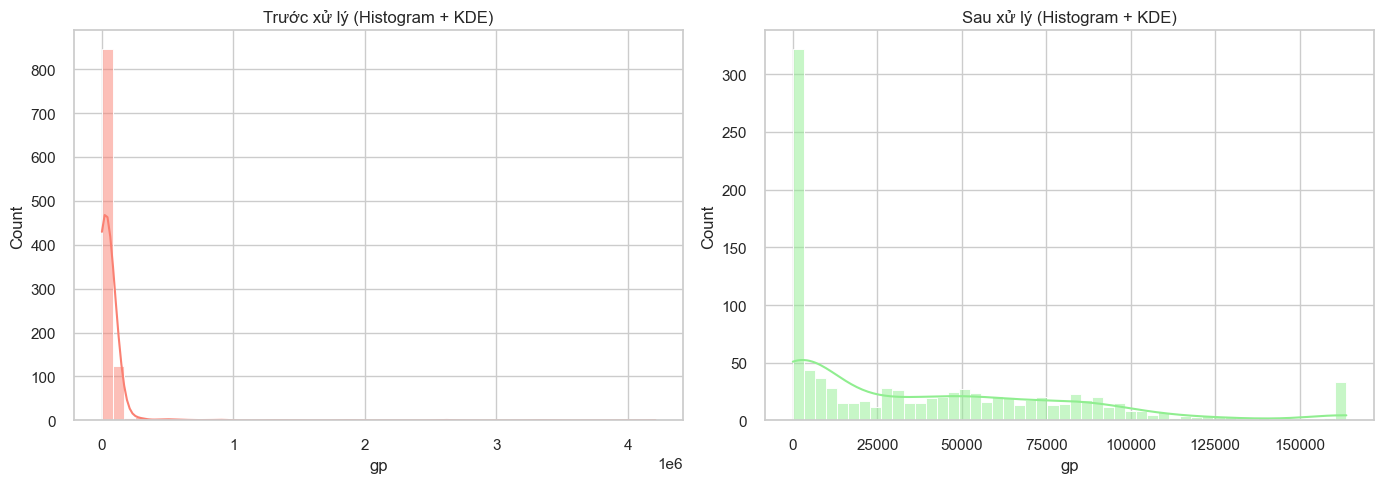


[SALES PURCHASE] - Xử lý outlier theo IQR (Capping)
 - price: 2,307,238 giá trị outlier bị capping


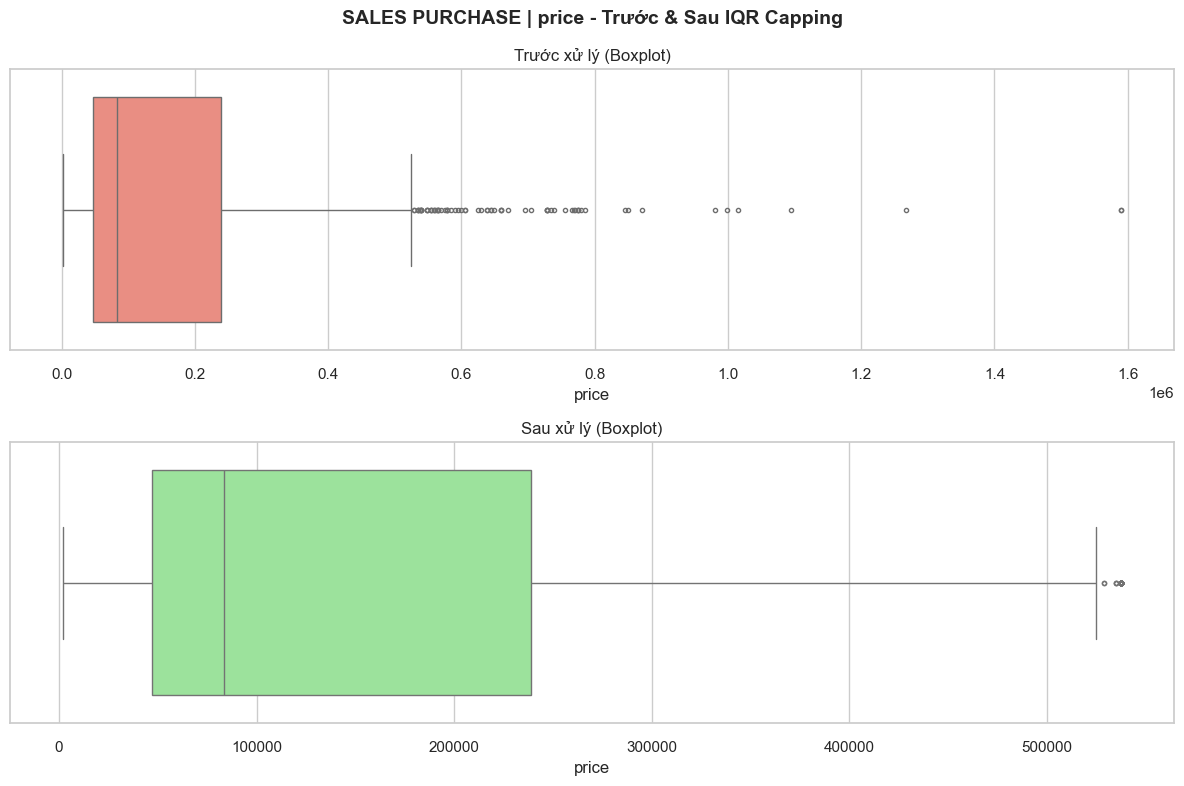

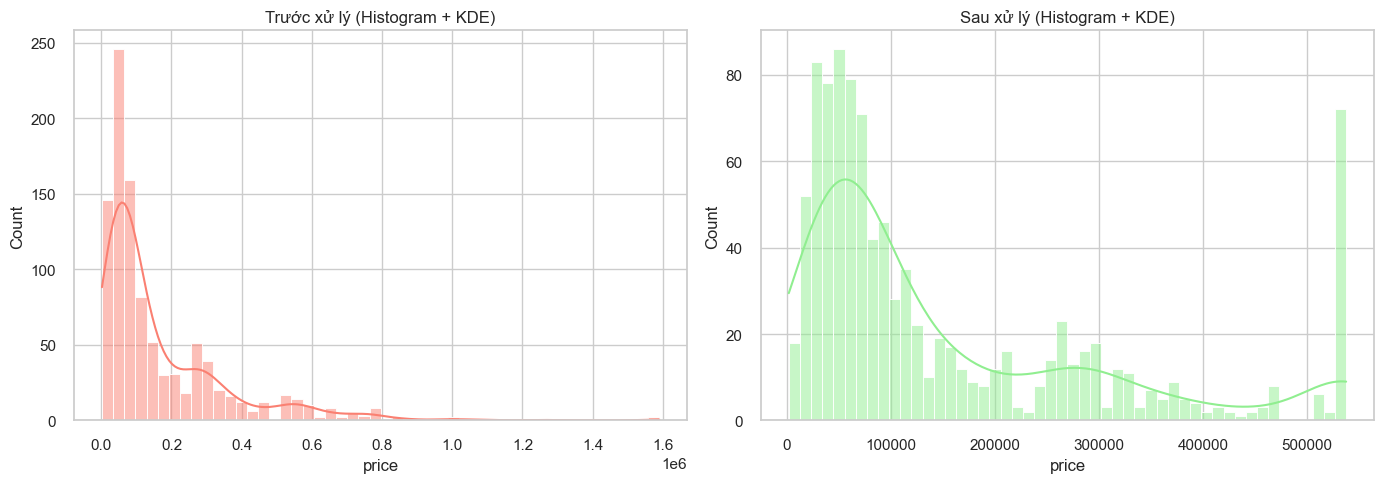

 - timestamp: 0 giá trị outlier bị capping


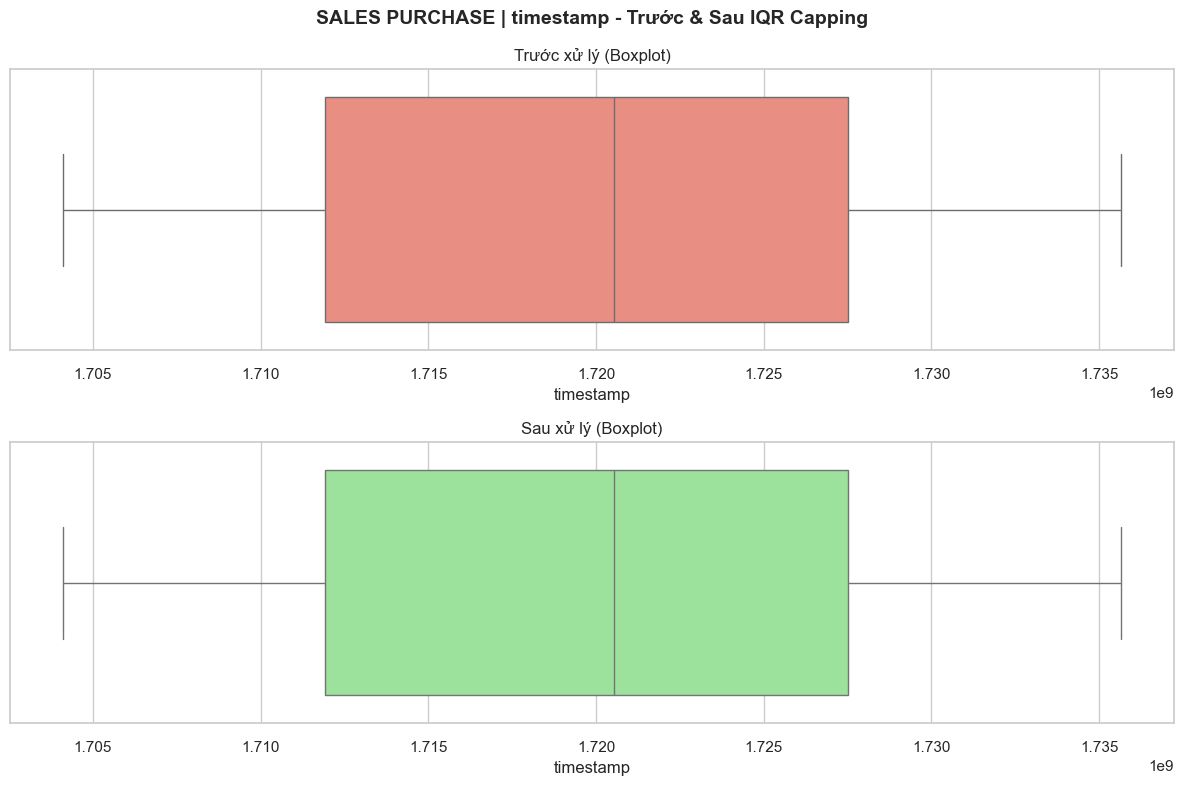

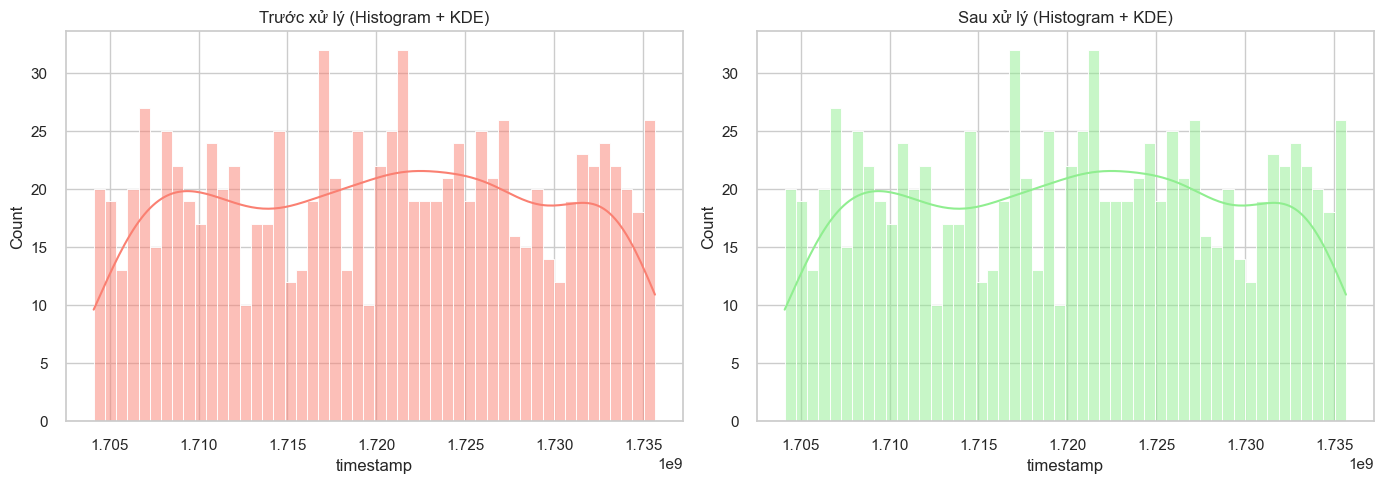


[SALES USER] - Xử lý outlier theo IQR (Capping)
 - timestamp: 177,747 giá trị outlier bị capping


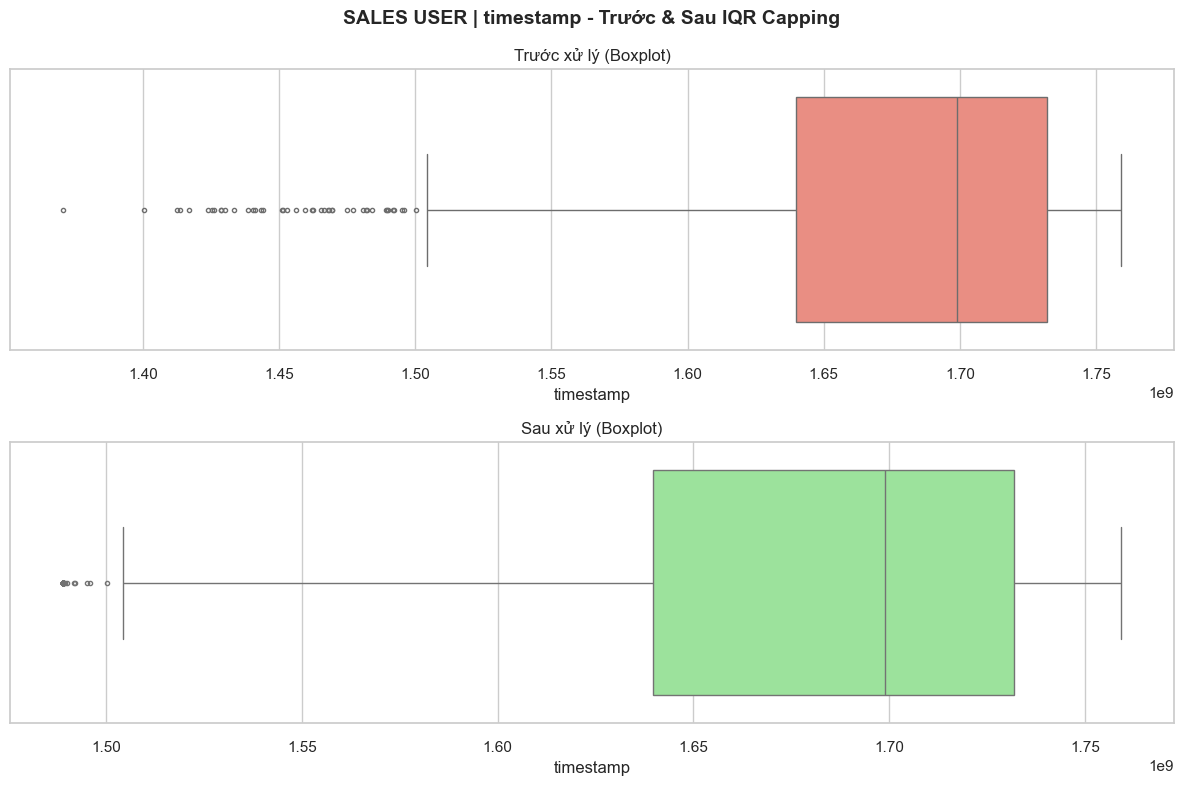

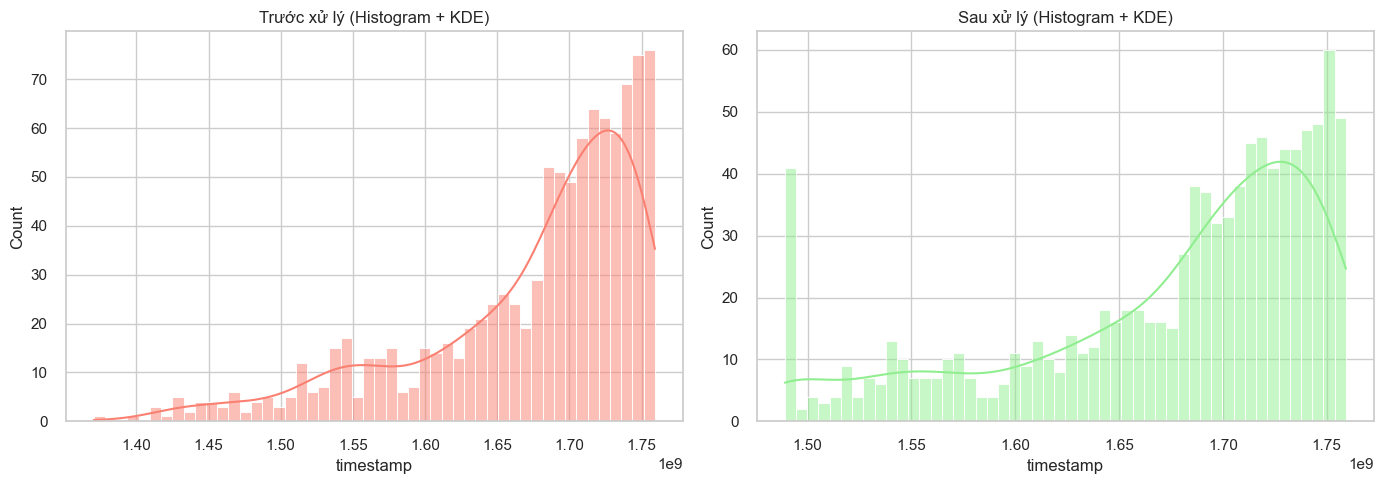

 - install_date: 241,688 giá trị outlier bị capping


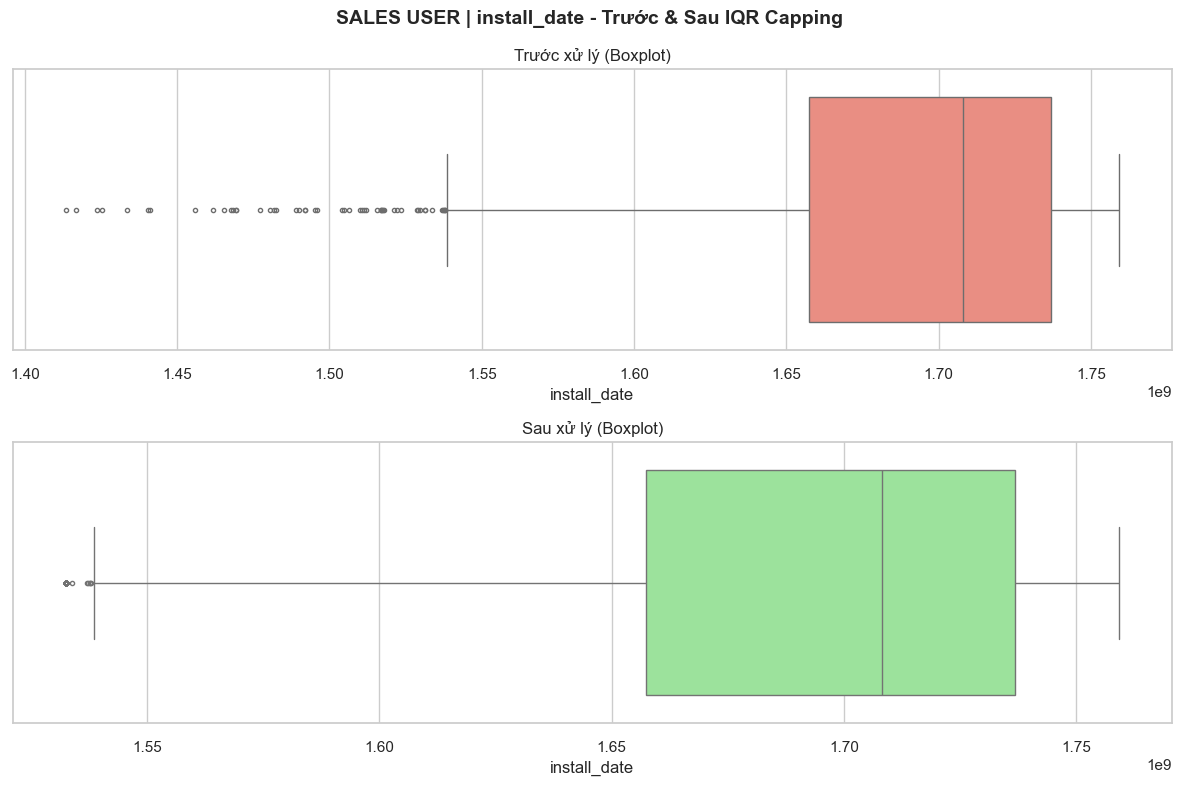

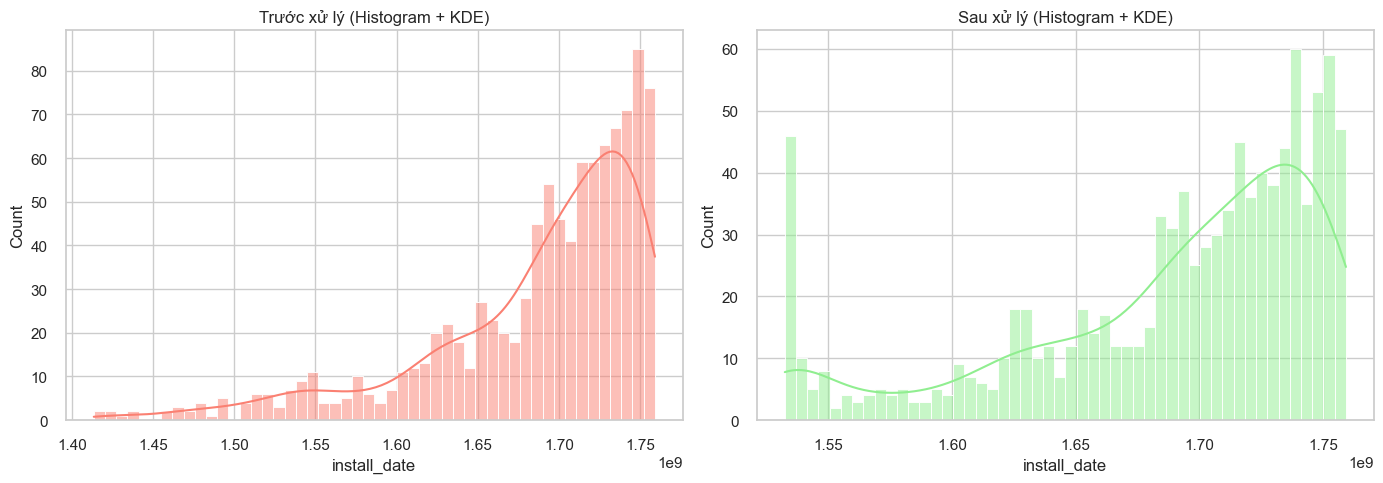


Hoàn tất xử lý outlier cho tất cả nhóm.


In [12]:
for group_name, cols in target_columns.items():
    df = datasets.get(group_name)
    if df is None:
        print(f"Không tìm thấy dataset '{group_name}'.")
        continue

    num_cols = [col for col in cols if col in df.columns]
    if not num_cols:
        print(f"[{group_name}] Không có cột numeric hợp lệ để xử lý.")
        continue

    print(f"\n[{group_name}] - Xử lý outlier theo IQR (Capping)")

    df_result = df.clone()

    for col in num_cols:
        try:
            df[col].to_numpy().astype(float)
        except:
            print(f"Cột '{col}' không numeric, bỏ qua capping.")
            continue

        # Tính IQR và khoảng capping
        Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_iqr, upper_iqr = Q1 - 1.5*IQR, Q3 + 1.5*IQR

        n_outliers = df.filter((pl.col(col) < lower_iqr) | (pl.col(col) > upper_iqr)).height
        print(f" - {col}: {n_outliers:,} giá trị outlier bị capping")

        # Capping
        df_result = df_result.with_columns(
            pl.when(pl.col(col) < lower_iqr).then(lower_iqr)
            .when(pl.col(col) > upper_iqr).then(upper_iqr)
            .otherwise(pl.col(col)).alias(col)
        )

        # Lấy mẫu để vẽ biểu đồ tránh MemoryError
        df_before = df.select(col).to_pandas()
        df_after = df_result.select(col).to_pandas()
        if len(df_before) > max_sample:
            df_before_plot = df_before[col].sample(n=max_sample, random_state=42)
            df_after_plot = df_after[col].sample(n=max_sample, random_state=42)
        else:
            df_before_plot = df_before[col]
            df_after_plot = df_after[col]

        df_before_plot = df_before_plot.astype(float)
        df_after_plot = df_after_plot.astype(float)

        # Vẽ Boxplot + Histogram với KDE
        fig, axes = plt.subplots(2, 1, figsize=(12, 8))
        fig.suptitle(f"{group_name} | {col} - Trước & Sau IQR Capping", fontsize=14, fontweight="bold")

        # Boxplots
        sns.boxplot(x=df_before_plot, color="salmon", fliersize=3, ax=axes[0])
        axes[0].set_title("Trước xử lý (Boxplot)")
        sns.boxplot(x=df_after_plot, color="lightgreen", fliersize=3, ax=axes[1])
        axes[1].set_title("Sau xử lý (Boxplot)")

        plt.tight_layout()
        plt.show()

        # Histogram + KDE bằng seaborn
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        sns.histplot(df_before_plot, bins=50, kde=True, color='salmon', ax=axes[0])
        axes[0].set_title("Trước xử lý (Histogram + KDE)")
        sns.histplot(df_after_plot, bins=50, kde=True, color='lightgreen', ax=axes[1])
        axes[1].set_title("Sau xử lý (Histogram + KDE)")
        plt.tight_layout()
        plt.show()

    # Cập nhật dataset
    datasets[group_name] = df_result

print("\nHoàn tất xử lý outlier cho tất cả nhóm.")


In [13]:
# Update cho dataset
datasets[group_name] = df_result

TASK 3:

In [14]:
# Giới hạn mẫu nếu dataset quá lớn
max_sample = 100_000  # giảm xuống để tránh MemoryError

for name, df in datasets.items():
    if df is None:
        continue

    # Lấy các cột numeric
    num_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in pl.NUMERIC_DTYPES]
    if len(num_cols) < 2:
        print(f"[{name}] Không đủ cột số để tính tương quan.")
        continue

    # Lấy mẫu nhỏ nếu quá lớn
    df_sample = df.select(num_cols)
    if df_sample.height > max_sample:
        df_sample = df_sample.sample(n=max_sample, seed=42)

    # Tính tương quan trực tiếp từng cặp cột
    high_corr_pairs = []
    for i, col1 in enumerate(num_cols):
        for col2 in num_cols[i+1:]:
            corr = df_sample.select(pl.corr(col1, col2)).to_numpy()[0][0]
            if abs(corr) > 0.85:
                high_corr_pairs.append((col1, col2, corr))

    print(f"\n[ {name} ] Các cặp biến có tương quan cao (> 0.85):")
    if high_corr_pairs:
        for col1, col2, corr in high_corr_pairs:
            print(f"  {col1} ↔ {col2} : {corr:.3f}")
    else:
        print("Không có cặp nào quá tương đồng.")



[ SALES ITEM ] Các cặp biến có tương quan cao (> 0.85):
Không có cặp nào quá tương đồng.

[ SALES PURCHASE ] Các cặp biến có tương quan cao (> 0.85):
  timestamp ↔ date_key : 0.998
  event_value ↔ quantity : 1.000

[ SALES USER ] Các cặp biến có tương quan cao (> 0.85):
Không có cặp nào quá tương đồng.


In [15]:
reduced_datasets = {}

for name, df in datasets.items():
    if df is None:
        continue

    # Lấy các cột numeric
    num_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in pl.NUMERIC_DTYPES]
    if len(num_cols) < 2:
        continue

    # Lấy mẫu nếu quá lớn
    max_sample = 100_000  # giảm để tránh MemoryError
    df_sample = df.select(num_cols)
    if df_sample.height > max_sample:
        df_sample = df_sample.sample(n=max_sample, seed=42)

    # Tính ma trận tương quan tuyệt đối
    corr_matrix = df_sample.to_pandas().corr().abs()

    # Lấy upper triangle để tránh lặp cặp
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    high_corr_pairs = (
        corr_matrix.where(mask)
        .stack()
        .reset_index()
        .rename(columns={0: "correlation", "level_0": "feature_1", "level_1": "feature_2"})
        .query("correlation > 0.85")
    )

    to_drop = set()
    if not high_corr_pairs.empty:
        print(f"\n[ {name} ] Các cặp biến có tương quan cao (> 0.85):")
        for _, row in high_corr_pairs.iterrows():
            f1, f2, corr_val = row["feature_1"], row["feature_2"], row["correlation"]
            print(f" - {f1} ↔ {f2} : correlation = {corr_val:.3f}")
            # Quy tắc: bỏ cột thứ 2 trong cặp
            if f2 not in to_drop:
                to_drop.add(f2)
                print(f"   → Bỏ cột '{f2}' vì quá tương đồng với '{f1}'")

        print(f"\n[ {name} ] Tổng số cột loại bỏ: {len(to_drop)}")
        print("Danh sách cột bị loại bỏ:", list(to_drop))
        # Tạo dataset mới sau khi bỏ các cột
        reduced_datasets[name] = df.drop(list(to_drop))
    else:
        print(f"\n[ {name} ] Không có feature nào cần loại bỏ.\n")
        reduced_datasets[name] = df



[ SALES ITEM ] Không có feature nào cần loại bỏ.


[ SALES PURCHASE ] Các cặp biến có tương quan cao (> 0.85):
 - timestamp ↔ date_key : correlation = 0.998
   → Bỏ cột 'date_key' vì quá tương đồng với 'timestamp'
 - event_value ↔ quantity : correlation = 1.000
   → Bỏ cột 'quantity' vì quá tương đồng với 'event_value'

[ SALES PURCHASE ] Tổng số cột loại bỏ: 2
Danh sách cột bị loại bỏ: ['date_key', 'quantity']

[ SALES USER ] Không có feature nào cần loại bỏ.




[ SALES ITEM ] - Biểu đồ tương quan trước và sau khi loại bỏ:


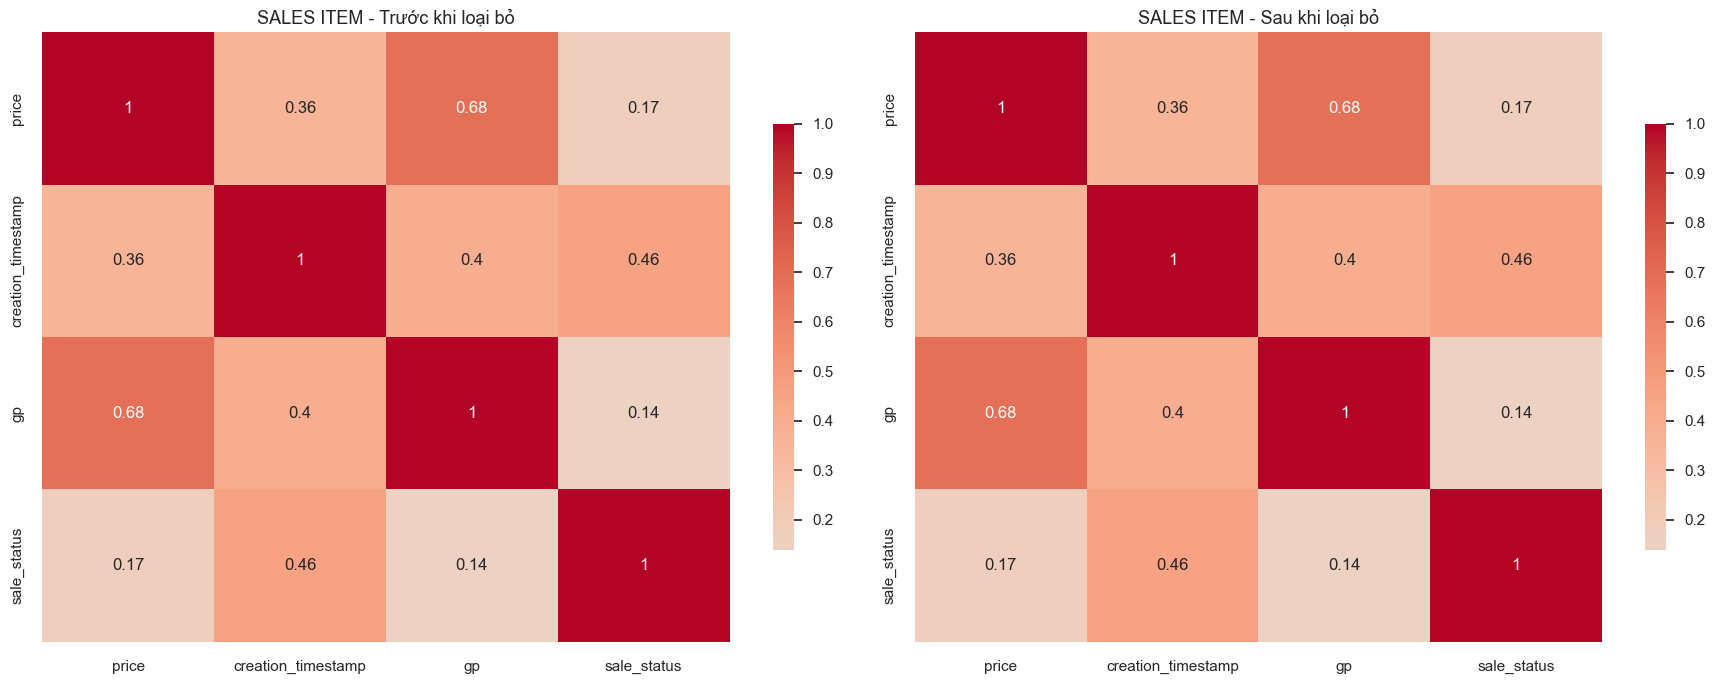


[ SALES PURCHASE ] - Biểu đồ tương quan trước và sau khi loại bỏ:


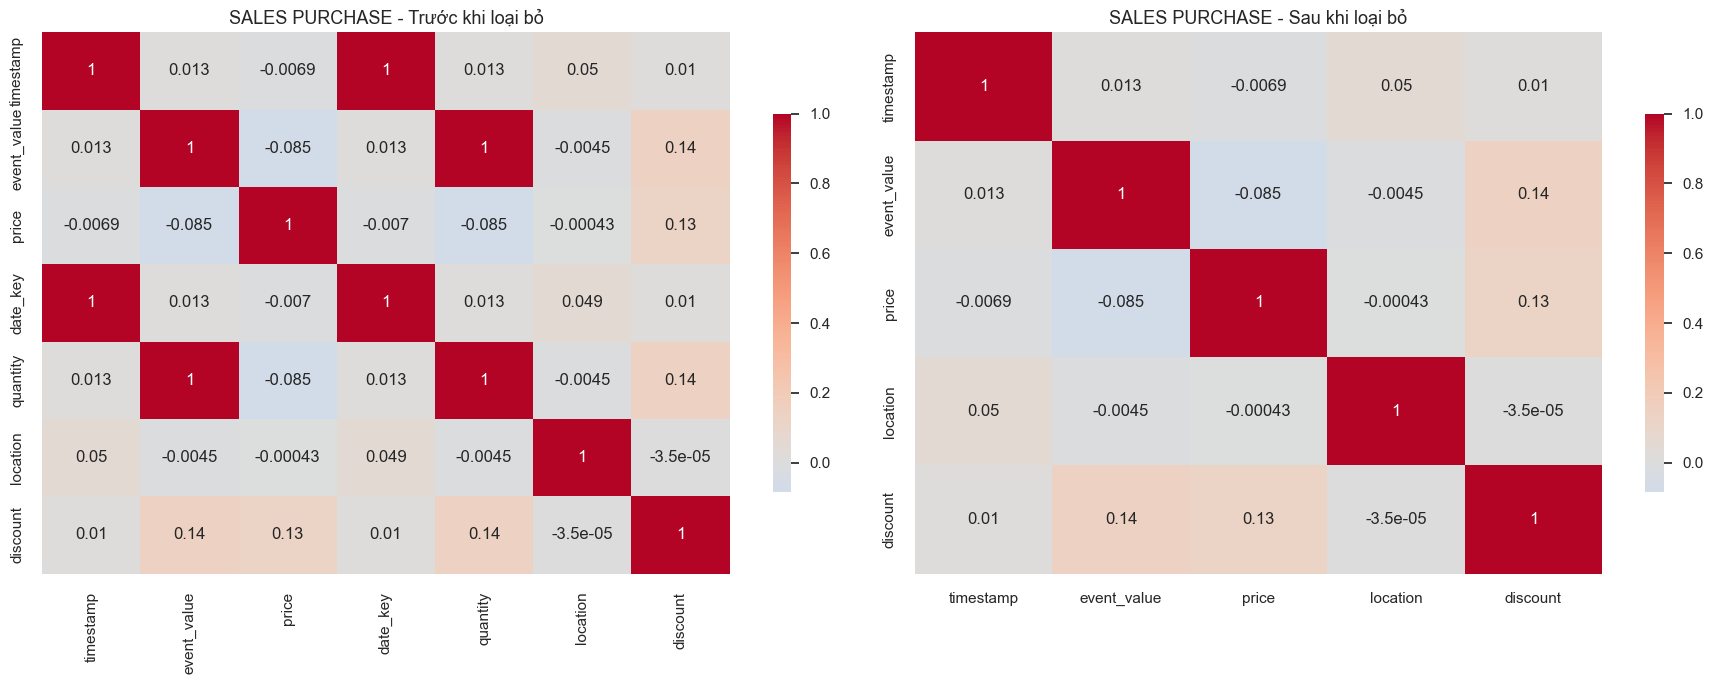


[ SALES USER ] - Biểu đồ tương quan trước và sau khi loại bỏ:


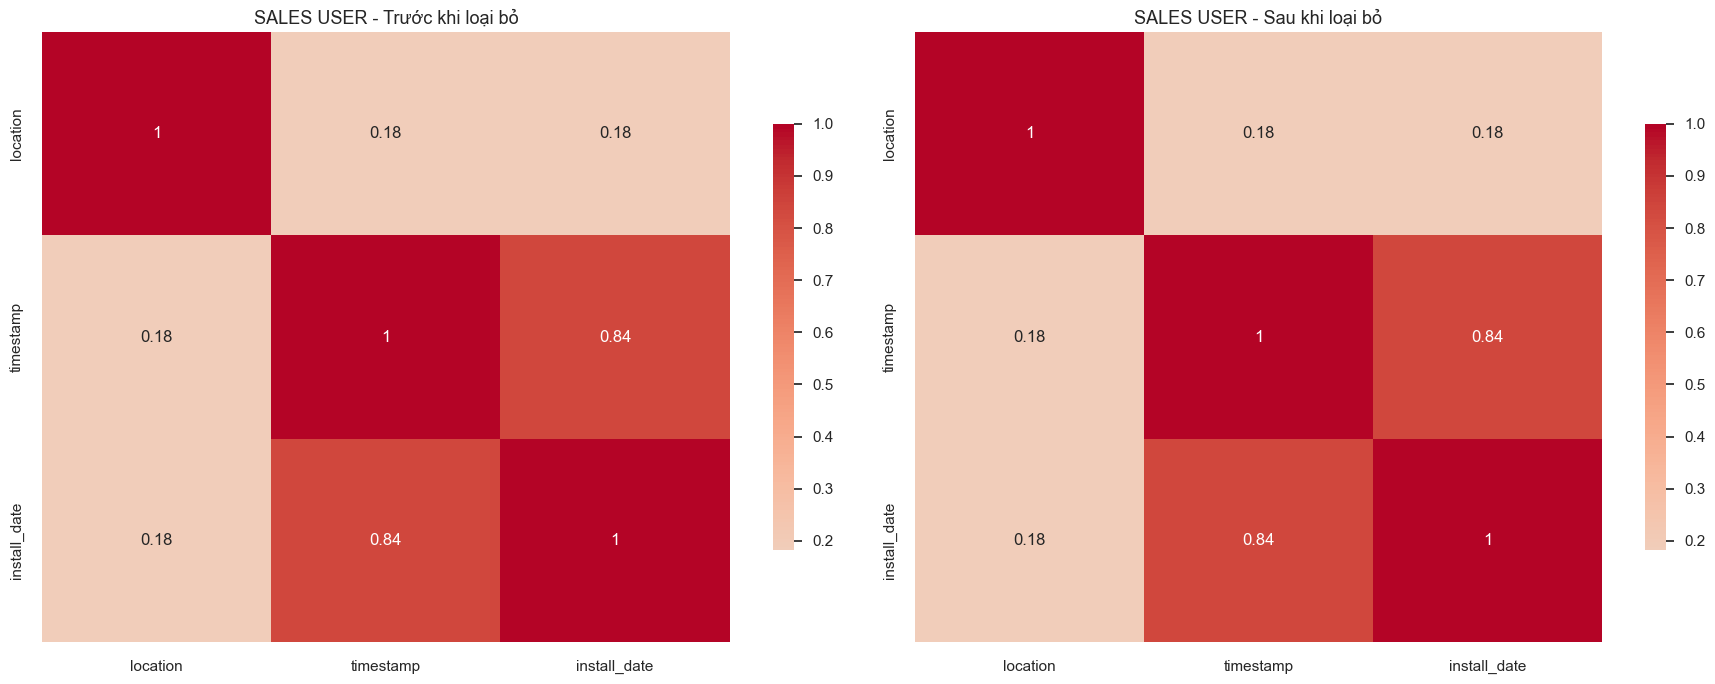

In [16]:
# Visualize
for name in reduced_datasets:
    print(f"\n[ {name} ] - Biểu đồ tương quan trước và sau khi loại bỏ:")

    num_cols_before = [col for col, dtype in zip(datasets[name].columns, datasets[name].dtypes) if dtype in pl.NUMERIC_DTYPES]
    num_cols_after = [col for col, dtype in zip(reduced_datasets[name].columns, reduced_datasets[name].dtypes) if dtype in pl.NUMERIC_DTYPES]

    df_before = datasets[name].select(num_cols_before)
    df_after = reduced_datasets[name].select(num_cols_after)

    max_sample = 50000
    if df_before.height > max_sample:
        df_before = df_before.sample(n=max_sample, seed=42)
    if df_after.height > max_sample:
        df_after = df_after.sample(n=max_sample, seed=42)

    corr_before = df_before.to_pandas().corr()
    corr_after = df_after.to_pandas().corr()

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(corr_before, annot=True, cmap="coolwarm", ax=axes[0], center=0, cbar_kws={'shrink': 0.7})
    axes[0].set_title(f"{name} - Trước khi loại bỏ", fontsize=13)

    sns.heatmap(corr_after, annot=True, cmap="coolwarm", ax=axes[1], center=0, cbar_kws={'shrink': 0.7})
    axes[1].set_title(f"{name} - Sau khi loại bỏ", fontsize=13)

    plt.tight_layout()
    plt.show()


In [17]:
datasets.update(reduced_datasets)

TASK 4:

In [18]:
"""
# --- Chuẩn hóa kiểu dữ liệu ---
def normalize_types(df)
    for col in df.columns
        dtype = df[col].dtype
        # Chuẩn hóa chuỗi
        if dtype == pl.Utf8
            df = df.with_columns(
                pl.col(col)
                .str.strip_chars()
                .str.to_lowercase()
                .fill_null()
                .alias(col)
            )
        # Chuẩn hóa số (điền 0 nếu thiếu)
        elif dtype in [pl.Int64, pl.Float64]
            df = df.with_columns(
                pl.col(col).fill_null(0).alias(col)
            )
    return df


# --- Chuẩn hóa định dạng ngày tháng ---
def normalize_dates(df)
    for col in df.columns
        if date in col or time in col
            try
                df = df.with_columns(
                    pl.col(col).str.to_datetime(strict=False).alias(col)
                )
            except
                pass
    return df


# --- Áp dụng cho từng bảng, có kiểm tra None ---
def safe_normalize(df, name)
    if df is None
        print(fBỏ qua {name} (không có dữ liệu))
        return None
    df = normalize_types(df)
    df = normalize_dates(df)
    return df


sales_item_df = safe_normalize(sales_item_df, SALES ITEM)
sales_purchase_df = safe_normalize(sales_purchase_df, SALES PURCHASE)
sales_user_df = safe_normalize(sales_user_df, SALES USER)


# --- Biến đổi dữ liệu tùy bảng ---
if sales_purchase_df is not None
    if price in sales_purchase_df.columns and quantity in sales_purchase_df.columns
        sales_purchase_df = sales_purchase_df.with_columns(
            (pl.col(price)  pl.col(quantity)).alias(total_amount)
        )

if sales_user_df is not None and gender in sales_user_df.columns
    sales_user_df = sales_user_df.with_columns(
        pl.when(pl.col(gender).str.contains(f)).then(female)
        .when(pl.col(gender).str.contains(m)).then(male)
        .otherwise(unknown)
        .alias(gender)
    )


# --- Tổng kết lại dữ liệu sau chuẩn hóa ---
print(nDỮ LIỆU SAU CHUẨN HÓA)
for name, df in {
    SALES ITEM sales_item_df,
    SALES PURCHASE sales_purchase_df,
    SALES USER sales_user_df
}.items()
    if df is not None
        print(f{name} {df.shape[0],} rows × {df.shape[1]} columns)
    else
        print(f{name} Không có dữ liệu)


# --- Lưu kết quả vào dictionary chung ---
datasets_cleaned = {
    SALES ITEM sales_item_df,
    SALES PURCHASE sales_purchase_df,
    SALES USER sales_user_df
}
"""

'\n# --- Chuẩn hóa kiểu dữ liệu ---\ndef normalize_types(df)\n    for col in df.columns\n        dtype = df[col].dtype\n        # Chuẩn hóa chuỗi\n        if dtype == pl.Utf8\n            df = df.with_columns(\n                pl.col(col)\n                .str.strip_chars()\n                .str.to_lowercase()\n                .fill_null()\n                .alias(col)\n            )\n        # Chuẩn hóa số (điền 0 nếu thiếu)\n        elif dtype in [pl.Int64, pl.Float64]\n            df = df.with_columns(\n                pl.col(col).fill_null(0).alias(col)\n            )\n    return df\n\n\n# --- Chuẩn hóa định dạng ngày tháng ---\ndef normalize_dates(df)\n    for col in df.columns\n        if date in col or time in col\n            try\n                df = df.with_columns(\n                    pl.col(col).str.to_datetime(strict=False).alias(col)\n                )\n            except\n                pass\n    return df\n\n\n# --- Áp dụng cho từng bảng, có kiểm tra None ---\ndef safe

TASK 5:

In [19]:
def get_df_from_datasets(name: str):
    """Lấy clone của dataframe từ datasets (an toàn để chỉnh sửa)."""
    df = datasets.get(name)
    if df is None:
        return None
    return df.clone()

def drop_if_exists(df: pl.DataFrame, cols: list):
    """Drop các cột nếu tồn tại trong df (trả về df mới)."""
    to_drop = [c for c in cols if c in df.columns]
    if to_drop:
        df = df.drop(to_drop)
    return df

# --- SALES ITEM -------
sales_item_df = get_df_from_datasets("SALES ITEM")
if sales_item_df is not None:
    print("Tạo đặc trưng cho SALES ITEM...")

    # ITEM AGE (tính số ngày từ created_date đến hiện tại)
    if "created_date" in sales_item_df.columns:
        try:
            sales_item_df = sales_item_df.with_columns(
                pl.col("created_date").str.strptime(pl.Datetime, strict=False).alias("_tmp_created_dt")
            )
            non_null = sales_item_df.select(pl.col("_tmp_created_dt").is_not_null().sum()).to_numpy()[0][0]
            if non_null and non_null > 0:
                now_date = pl.lit(datetime.now().date()).cast(pl.Date)
                sales_item_df = sales_item_df.with_columns(
                    ((now_date - pl.col("_tmp_created_dt").cast(pl.Date)).cast(pl.Int64)).alias("item_age_days")
                )
            else:
                sales_item_df = sales_item_df.with_columns(pl.lit(None).alias("item_age_days"))
        except Exception:
            # Nếu parse lỗi, gán None cho cột item_age_days
            sales_item_df = sales_item_df.with_columns(pl.lit(None).alias("item_age_days"))
    else:
        # Không có created_date -> tạo cột rỗng để giữ cấu trúc
        sales_item_df = sales_item_df.with_columns(pl.lit(None).alias("item_age_days"))

    # remove temporary column nếu có
    sales_item_df = drop_if_exists(sales_item_df, ["_tmp_created_dt"])

    # IS NEW BRAND (xác định brand "hiếm" theo ngưỡng quantile)
    if "brand" in sales_item_df.columns:
        try:
            brand_counts = sales_item_df.group_by("brand").agg(pl.count().alias("brand_count"))
            # tính quantile 0.1 của brand_count (10% nhỏ nhất)
            # bảo đảm không lỗi khi brand_counts rỗng
            if brand_counts.height > 0:
                qr = brand_counts.select(pl.col("brand_count").quantile(0.1)).to_numpy()
                # qr có thể có shape (1,1) hoặc (1,) => lấy an toàn
                threshold = float(qr.flatten()[0]) if qr.size else 0.0
            else:
                threshold = 0.0

            # join để có brand_count trên hàng gốc
            sales_item_df = sales_item_df.join(brand_counts, on="brand", how="left")

            # tạo cột is_new_brand: True nếu brand_count <= threshold, False nếu null hoặc > threshold
            sales_item_df = sales_item_df.with_columns(
                pl.when(pl.col("brand_count").is_null()).then(False)
                .otherwise(pl.col("brand_count") <= threshold)
                .alias("is_new_brand")
            )
        except Exception:
            # nếu lỗi trong tính toán, tạo cột default False
            sales_item_df = sales_item_df.with_columns(pl.lit(False).alias("is_new_brand"))

        # drop brand_count tạm nếu không cần giữ
        sales_item_df = drop_if_exists(sales_item_df, ["brand_count"])
    else:
        # không có brand -> tạo cột mặc định False để chuẩn hoá schema
        sales_item_df = sales_item_df.with_columns(pl.lit(False).alias("is_new_brand"))

    # Gán lại vào datasets để phần sau sử dụng
    datasets["SALES ITEM"] = sales_item_df

# --- SALES PURCHASE -----
sales_purchase_df = get_df_from_datasets("SALES PURCHASE")
if sales_purchase_df is not None:
    print("Tạo đặc trưng cho SALES PURCHASE...")

    # TIMESTAMP -> purchase_hour, purchase_dayofweek, is_weekend_purchase
    if "timestamp" in sales_purchase_df.columns:
        try:
            sales_purchase_df = sales_purchase_df.with_columns(
                pl.col("timestamp").str.strptime(pl.Datetime, strict=False).alias("_tmp_ts")
            )
            non_null = sales_purchase_df.select(pl.col("_tmp_ts").is_not_null().sum()).to_numpy()[0][0]
            if non_null and non_null > 0:
                sales_purchase_df = sales_purchase_df.with_columns([
                    pl.col("_tmp_ts").dt.hour().alias("purchase_hour"),
                    pl.col("_tmp_ts").dt.weekday().alias("purchase_dayofweek"),
                    pl.col("_tmp_ts").dt.weekday().is_in([5, 6]).alias("is_weekend_purchase"),
                ])
            else:
                sales_purchase_df = sales_purchase_df.with_columns([
                    pl.lit(None).alias("purchase_hour"),
                    pl.lit(None).alias("purchase_dayofweek"),
                    pl.lit(None).alias("is_weekend_purchase"),
                ])
        except Exception:
            sales_purchase_df = sales_purchase_df.with_columns([
                pl.lit(None).alias("purchase_hour"),
                pl.lit(None).alias("purchase_dayofweek"),
                pl.lit(None).alias("is_weekend_purchase"),
            ])
    else:
        # nếu không có timestamp -> thêm cột null để chuẩn schema
        sales_purchase_df = sales_purchase_df.with_columns([
            pl.lit(None).alias("purchase_hour"),
            pl.lit(None).alias("purchase_dayofweek"),
            pl.lit(None).alias("is_weekend_purchase"),
        ])

    # remove tmp col
    sales_purchase_df = drop_if_exists(sales_purchase_df, ["_tmp_ts"])

    # DISCOUNT RATE = discount / price (nếu price không null và != 0)
    if all(c in sales_purchase_df.columns for c in ["discount", "price"]):
        try:
            sales_purchase_df = sales_purchase_df.with_columns(
                (
                    pl.when(pl.col("price").is_null() | (pl.col("price") == 0))
                    .then(None)
                    .otherwise(pl.col("discount") / pl.col("price"))
                ).alias("discount_rate")
            )
        except Exception:
            sales_purchase_df = sales_purchase_df.with_columns(pl.lit(None).alias("discount_rate"))
    else:
        # tạo cột null nếu muốn chuẩn hoá schema
        if "discount_rate" not in sales_purchase_df.columns:
            sales_purchase_df = sales_purchase_df.with_columns(pl.lit(None).alias("discount_rate"))

    # PURCHASE COUNT PER ITEM (tạo feature group by item_id)
    if "item_id" in sales_purchase_df.columns:
        try:
            item_counts = sales_purchase_df.group_by("item_id").agg(pl.count().alias("purchase_count_per_item"))
            sales_purchase_df = sales_purchase_df.join(item_counts, on="item_id", how="left")
        except Exception:
            # nếu lỗi thì đảm bảo cột existence (null)
            sales_purchase_df = sales_purchase_df.with_columns(pl.lit(None).alias("purchase_count_per_item"))
    else:
        if "purchase_count_per_item" not in sales_purchase_df.columns:
            sales_purchase_df = sales_purchase_df.with_columns(pl.lit(None).alias("purchase_count_per_item"))

    # Gán lại
    datasets["SALES PURCHASE"] = sales_purchase_df

# --- SALES USER ---------
sales_user_df = get_df_from_datasets("SALES USER")
if sales_user_df is not None:
    print("Tạo đặc trưng cho SALES USER...")

    # is_loyal từ membership (ví dụ 'premium' là loyal)
    if "membership" in sales_user_df.columns:
        try:
            sales_user_df = sales_user_df.with_columns(
                (pl.col("membership").str.to_lowercase() == "premium").alias("is_loyal")
            )
        except Exception:
            sales_user_df = sales_user_df.with_columns(pl.lit(False).alias("is_loyal"))
    else:
        sales_user_df = sales_user_df.with_columns(pl.lit(False).alias("is_loyal"))

    # location_density: số user theo location
    if "location" in sales_user_df.columns:
        try:
            loc_density = sales_user_df.group_by("location").agg(pl.count().alias("location_density"))
            sales_user_df = sales_user_df.join(loc_density, on="location", how="left")
        except Exception:
            if "location_density" not in sales_user_df.columns:
                sales_user_df = sales_user_df.with_columns(pl.lit(None).alias("location_density"))
    else:
        if "location_density" not in sales_user_df.columns:
            sales_user_df = sales_user_df.with_columns(pl.lit(None).alias("location_density"))

    # Gán lại
    datasets["SALES USER"] = sales_user_df

print("Feature creation finished.")


Tạo đặc trưng cho SALES ITEM...
Tạo đặc trưng cho SALES PURCHASE...
Tạo đặc trưng cho SALES USER...
Feature creation finished.


[TEST] - IN RA DỮ LIỆU ĐỂ ĐỌC

In [20]:
# Thống kê tất cả các cột trong từng bảng ()
# Tháo docstring (""") ra để chạy thử, nhưng khá lâu!
# Khỏi chạy nếu không cần thiết!

for name, df in datasets.items():
    if df is None:
        continue

    print(f"\n[ {name} ]")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print("Columns:", df.columns)

    print("\nThống kê tất cả các cột:")
    for col in df.columns:
        try:
            # Ép kiểu về chuỗi để thống kê phổ biến
            col_str = df[col].cast(pl.Utf8).drop_nulls()
            unique_count = col_str.n_unique()
            most_common = col_str.value_counts().sort("count", descending=True).head(1)

            if most_common.shape[0] > 0:
                most_common_val = most_common[0, col]
                most_common_freq = most_common[0, "count"]
                print(f" - {col}: {unique_count} giá trị duy nhất, phổ biến nhất: '{most_common_val}' ({most_common_freq} lần)")
            else:
                print(f" - {col}: {unique_count} giá trị duy nhất, không có giá trị phổ biến")

        except Exception as e:
            print(f"Lỗi khi thống kê cột '{col}': {e}")


[ SALES ITEM ]
Shape: 27,332 rows × 21 columns
Columns: ['price', 'category_l1', 'category_l2', 'category_l3', 'category', 'brand', 'creation_timestamp', 'created_date', 'updated_date', 'gender_target', 'age_group', 'item_type', 'gp', 'color', 'size', 'origin', 'volume', 'material', 'sale_status', 'item_age_days', 'is_new_brand']

Thống kê tất cả các cột:
 - price: 347 giá trị duy nhất, phổ biến nhất: '49000.0' (3715 lần)
 - category_l1: 15 giá trị duy nhất, phổ biến nhất: 'Thời trang' (15042 lần)
 - category_l2: 134 giá trị duy nhất, phổ biến nhất: 'Cơ cấu hàng cũ' (9105 lần)
 - category_l3: 470 giá trị duy nhất, phổ biến nhất: 'Thời trang bé trai, bé gái cũ' (5164 lần)
 - category: 1651 giá trị duy nhất, phổ biến nhất: 'Bộ bé trai Animo' (1018 lần)
 - brand: 976 giá trị duy nhất, phổ biến nhất: 'Animo' (8149 lần)
 - creation_timestamp: 10627 giá trị duy nhất, phổ biến nhất: '1433845777.0' (304 lần)
 - created_date: 12108 giá trị duy nhất, phổ biến nhất: '2024-05-15 11:42:37.247000' 

In [21]:
# Thống kê tất cả các cột trong từng bảng
# Tháo docstring (""") ra để chạy thử, nhưng khá lâu!
# Khỏi chạy nếu không cần thiết!

for name, df in datasets.items():
    if df is None:
        continue
    print(f"\n[ {name} ]")
    print("\nMô tả dữ liệu số:")
    display(df.describe())


[ SALES ITEM ]

Mô tả dữ liệu số:


statistic,price,category_l1,category_l2,category_l3,category,brand,creation_timestamp,created_date,updated_date,gender_target,age_group,item_type,gp,color,size,origin,volume,material,sale_status,item_age_days,is_new_brand
str,f64,str,str,str,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,f64,f64,f64
"""count""",27332.0,"""27332""","""27332""","""27332""","""27332""","""27332""",27332.0,"""27332""","""27332""","""27332""","""27332""","""27332""",27332.0,"""27332""","""27332""","""27332""","""27332""","""27332""",27332.0,0.0,27332.0
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,27332.0,0.0
"""mean""",142751.84992,null,null,null,null,null,1.6229e9,"""2021-05-31 17:17:33.849833""","""2025-08-30 04:07:07.766157""",null,null,null,38494.988837,null,null,null,null,null,0.167203,null,0.007098
"""std""",109120.160588,null,null,null,null,null,7.4408e7,null,null,null,null,null,42347.432039,null,null,null,null,null,0.373164,null,null
"""min""",0.0,"""Babycare""","""0-1Y""","""A2 milk""","""0-12M Bodysuit bé trai đùi""","""137 Degrees""",1.4338e9,"""2011-02-21 11:54:02.047000""","""2023-12-26 17:21:11.663000""","""Bé Gái""","""0-10M""","""BCS""",0.0,"""Bạc""","""0 tháng""",""" Singapore, Thụy Sĩ""","""1 lít""",""" Vải không dệt, bông cellulose…",0.0,null,0.0
"""25%""",49000.0,null,null,null,null,null,1.5755e9,"""2019-12-04 18:24:16.260000""","""2025-08-18 09:59:19.847000""",null,null,null,0.0,null,null,null,null,null,0.0,null,null
"""50%""",119000.0,null,null,null,null,null,1.6358e9,"""2021-11-01 13:19:26.080000""","""2025-09-26 08:05:23.153000""",null,null,null,25047.0,null,null,null,null,null,0.0,null,null
"""75%""",199000.0,null,null,null,null,null,1.6699e9,"""2022-12-01 15:40:42.260000""","""2025-09-27 00:05:36.233000""",null,null,null,65532.0,null,null,null,null,null,0.0,null,null
"""max""",424000.0,"""Đồ chơi & Sách""","""Đồ uống""","""Đồ hộp""","""Động vật mô hình""","""Đức Thành""",1.7559e9,"""2025-08-22 17:35:14.377000""","""2025-10-01 08:05:42.990000""","""Unisex""","""[""Từ 6M"", ""Từ 9M"", ""Từ 1Y""]""","""Ứng dụng mẹ và bé""",163830.0,"""Đỏ""","""XXL(15-25kg) - 26 miếng""","""Ấn Độ, Bulgaria""","""hộp 3 lọ x 250ml""","""﻿100% cotton﻿<br>""",1.0,null,1.0



[ SALES PURCHASE ]

Mô tả dữ liệu số:


statistic,timestamp,event_value,price,created_date,updated_date,channel,payment,location,discount,purchase_hour,purchase_dayofweek,is_weekend_purchase,discount_rate,purchase_count_per_item
str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64
"""count""",3.5729825e7,3.5729825e7,3.5729825e7,"""35729825""","""35729825""","""35729825""","""35729825""",3.5729825e7,3.5729825e7,0.0,0.0,0.0,3.5729825e7,0.0
"""null_count""",0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,3.5729825e7,3.5729825e7,3.5729825e7,0.0,3.5729825e7
"""mean""",1.7199e9,1.508098,157778.138713,"""2024-07-02 17:13:24.220955""","""2024-07-02 18:27:59.561504""",null,null,448.414508,17235.651914,null,null,null,1.239726,null
"""std""",9.1568e6,2.264976,153952.175963,null,null,null,null,247.505432,46673.708499,null,null,null,858.859112,null
"""min""",1.7041e9,1.0,0.0444,"""2024-01-01 06:44:59.037000""","""2024-01-01 06:44:59.233000""","""Android""","""Chuyển khoản""",16.0,0.0,null,null,null,0.0,null
"""25%""",1.7120e9,1.0,48316.3914,"""2024-04-01 16:44:10.513000""","""2024-04-01 17:15:12.017000""",null,null,234.0,0.0,null,null,null,0.0,null
"""50%""",1.7199e9,1.0,87000.0,"""2024-07-02 19:06:52.293000""","""2024-07-02 19:42:24.550000""",null,null,439.0,0.0,null,null,null,0.0,null
"""75%""",1.7279e9,1.0,244000.0,"""2024-10-02 19:55:22.447000""","""2024-10-02 20:24:53.813000""",null,null,653.0,15000.0,null,null,null,0.147909,null
"""max""",1.7357e9,240.0,537525.4129,"""2024-12-31 22:35:19.510000""","""2025-09-27 21:25:22.960000""","""iOS""","""ZaloPay""",1036.0,7.995e6,null,null,null,4.1854e6,null



[ SALES USER ]

Mô tả dữ liệu số:


statistic,gender,location,province,membership,timestamp,created_date,updated_date,region,location_name,install_app,install_date,district,is_loyal,location_density
str,str,f64,str,str,f64,str,str,str,str,str,f64,str,f64,f64
"""count""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""","""4573964""","""4573964""","""4573964""",4.573964e6,"""4573964""",4.573964e6,4.573964e6
"""null_count""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""",0.0,0.0
"""mean""",null,554.053518,null,null,1.6730e9,"""2022-12-16 22:48:44.025646""","""2025-06-11 05:52:40.770554""",null,null,null,1.6870e9,null,0.0,7228.286267
"""std""",null,295.523361,null,null,7.4840e7,null,null,null,null,null,6.3112e7,null,null,4133.35009
"""min""","""Khác""",42.0,"""An Giang""","""Diamond""",1.4890e9,"""2011-05-25 21:11:51.677000""","""2019-06-30 08:38:47.100000""","""Bắc Trung Bộ""","""AGI - 110 Quốc Lộ 91""","""Android""",1.5325e9,""" Vũng Liêm""",0.0,1.0
"""25%""",null,302.0,null,null,1.6343e9,"""2021-10-15 10:09:34.280000""","""2025-07-07 15:33:10.201316""",null,null,null,1.6550e9,null,null,4524.0
"""50%""",null,547.0,null,null,1.6960e9,"""2023-09-29 16:33:25.217000""","""2025-07-07 15:33:10.201316""",null,null,null,1.7054e9,null,null,6399.0
"""75%""",null,765.0,null,null,1.7312e9,"""2024-11-09 14:38:22.223000""","""2025-08-02 10:54:03.860000""",null,null,null,1.7366e9,null,null,9094.0
"""max""","""Nữ""",1310.0,"""Đồng Tháp""","""Standard""",1.7593e9,"""2025-09-30 22:00:36.623000""","""2025-09-30 23:22:08.957000""","""Đồng bằng sông Cửu Long""","""ĐTH - Trần Hưng Đạo""","""iOS""",1.7592e9,"""Ứng Hòa""",0.0,22383.0
